# Imports

In [33]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import datetime as dt
import mplfinance as mpf
import os
from os import listdir
from os.path import isfile, join
import time
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
import seaborn as sns

# Defining Tickers

In [21]:
AMZN = get_df_from_csv('AMZN')
add_daily_return_to_df(AMZN, 'AMZN')

NVDA = get_df_from_csv('NVDA')
add_daily_return_to_df(NVDA, 'NVDA')

AMD = get_df_from_csv('AMD')
add_daily_return_to_df(AMD, 'AMD')

GOOG = get_df_from_csv('GOOG')
add_daily_return_to_df(GOOG, 'GOOG')

TSLA = get_df_from_csv('TSLA')
add_daily_return_to_df(TSLA, 'TSLA')

AAPL = get_df_from_csv('AAPL')
add_daily_return_to_df(AAPL, 'AAPL')

FB = get_df_from_csv('FB')
add_daily_return_to_df(FB, 'FB')


tickers = ["FB", "AAPL", "TSLA","AMZN", "GOOG", "AMD", "NVDA"]
mult_df = merge_df_by_column_name('Adj Close', 2021, 1, 1, 2022, 5, 1, *tickers)

# download_multiple_stocks(2021, 1, 1, 2022, 5, 1, *tickers)








# Getting the Dates right

In [22]:
PATH = "/Users/donpipote/Downloads/Stocks in python/"

# Start Date
S_YEAR = 2021
S_MONTH = 1
S_DAY = 1
S_DATE_STR = f"{S_YEAR}-{S_MONTH}-{S_DAY}"
S_DATE_DATETIME = dt.datetime(S_YEAR, S_MONTH, S_DAY)

# End Date
E_YEAR = 2022
E_MONTH = 5
E_DAY = 1
E_DATE_STR = f"{E_YEAR}-{E_MONTH}-{E_DAY}"
E_DATE_DATETIME = dt.datetime(E_YEAR, E_MONTH, E_DAY)

In [23]:
def get_valid_dates(df, sdate, edate):
    try:
        mask = (df['Date'] > sdate) & (df['Date'] <= edate)
        sm_df = df.loc[mask]
        sm_df = sm_df.set_index(['Date'])
        sm_date = sm_df.index.min()
        last_date = sm_df.index.max()
        
        date_leading = '-'.join(('0' if len(x)<2 else '')+x for x in sm_date.split('-'))
        date_ending = '-'.join(('0' if len(x)<2 else '')+x for x in last_date.split('-'))
        print(date_leading, " ", date_ending)
        
    except Exception:
        print("Date Corrupted")
    else:
        return date_leading, date_ending

In [24]:
files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]
tickers.sort()
tickers

['AAPL ', 'AMD ', 'AMZN ', 'FB ', 'GOOG ', 'MSFT ', 'NVDA ', 'TSLA ']

In [25]:
def save_to_csv_from_yahoo(ticker, syear, smonth, sday, eyear, emonth, eday):
    start = dt.datetime(syear, smonth, sday)
    end = dt.datetime(eyear, emonth, eday)
    
    df = web.DataReader(ticker, 'yahoo', start, end)
    
    df.to_csv(ticker + '*.csv')
    return df

In [26]:
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(ticker + '*.csv')
    except FileNotFoundError:
        print("File Doesnt Exist")
    else:
        return df

# Total Return Since 2021/1

In [27]:
def get_return_defined_time(df, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    df['Date'] = pd.to_datetime(df['Date'])
    mask = (df['Date'] >= start) & (df['Date'] <= end)
    daily_ret = df.loc[mask]['daily_return'].mean()
    df2 = df.loc[mask]
    days = df2.shape[0]
    return (days * daily_ret * 100)

AMZN = get_df_from_csv('AMZN')
add_daily_return_to_df(AMZN, 'AMZN')

NVDA = get_df_from_csv('NVDA')
add_daily_return_to_df(NVDA, 'NVDA')

AMD = get_df_from_csv('AMD')
add_daily_return_to_df(AMD, 'AMD')

GOOG = get_df_from_csv('GOOG')
add_daily_return_to_df(GOOG, 'GOOG')

TSLA = get_df_from_csv('TSLA')
add_daily_return_to_df(TSLA, 'TSLA')

AAPL = get_df_from_csv('AAPL')
add_daily_return_to_df(AAPL, 'AAPL')

FB = get_df_from_csv('FB')
add_daily_return_to_df(FB, 'FB')

tot_ret = get_return_defined_time(AMZN, 2021, 1, 1, 2022, 5, 1)
tot_ret = get_return_defined_time(NVDA, 2021, 1, 1, 2022, 5, 1)
tot_ret = get_return_defined_time(FB, 2021, 1, 1, 2022, 5, 1)
tot_ret = get_return_defined_time(AMD, 2021, 1, 1, 2022, 5, 1)
tot_ret = get_return_defined_time(GOOG, 2021, 1, 1, 2022, 5, 1)
tot_ret = get_return_defined_time(TSLA, 2021, 1, 1, 2022, 5, 1)
tot_ret = get_return_defined_time(AAPL, 2021, 1, 1, 2022, 5, 1)

print("Total Return :", tot_ret)

Total Return : 25.249619016942308


### Total Return since 01-01-2021: +25.25%

# Visualizations

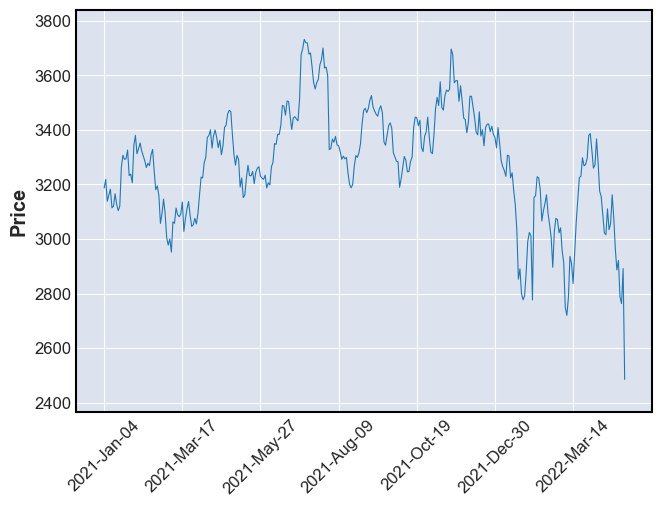

<Mpf_Figure size 1000x1000 with 0 Axes>

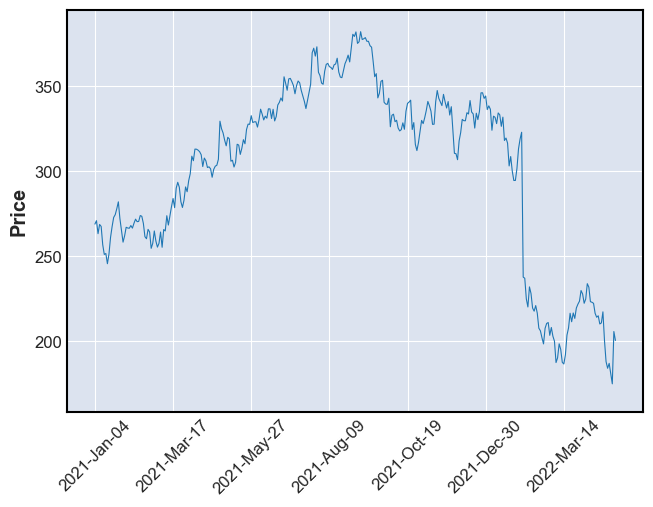

<Mpf_Figure size 1000x1000 with 0 Axes>

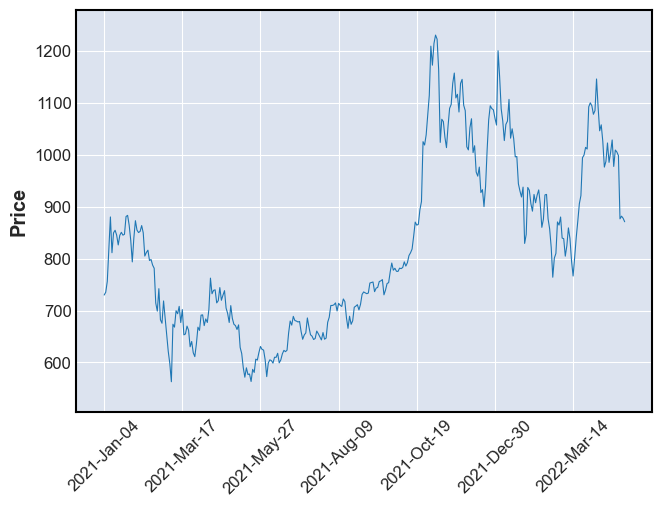

<Mpf_Figure size 1000x1000 with 0 Axes>

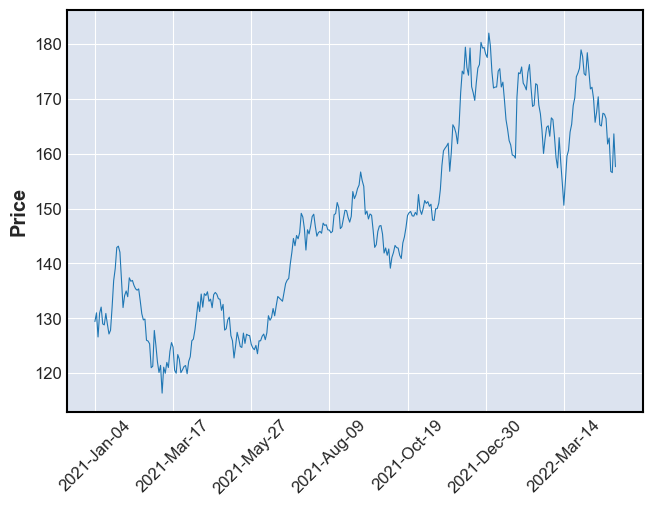

<Mpf_Figure size 1000x1000 with 0 Axes>

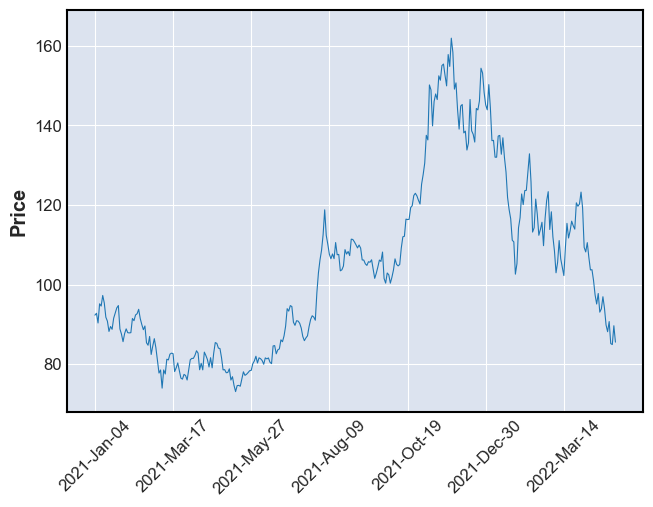

<Mpf_Figure size 1000x1000 with 0 Axes>

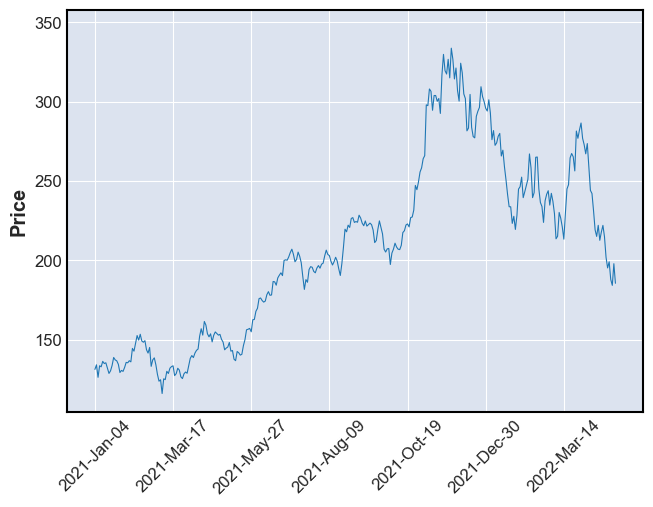

<Mpf_Figure size 1000x1000 with 0 Axes>

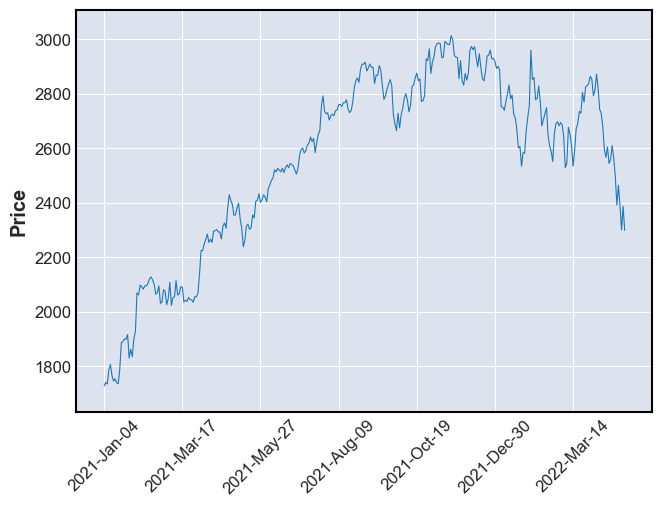

<Mpf_Figure size 1000x1000 with 0 Axes>

In [28]:
def mplfinance_plot(ticker, chart_type, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    try:
        df = pd.read_csv(ticker + '*.csv')
    except FileNotFoundError:
        print("File Doesnt Exist")
    else:
        df.index = pd.DatetimeIndex(df['Date'])
        df_sub = df.loc[start:end]
        #mpf.plot(df_sub, type='candle')
        mpf.plot(df_sub, type='line')
        #mpf.plot(df_sub, type='ohlc', mav=20)
        
        s = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 8})
        fig = mpf.figure(figsize=(10,10), style=s)
        #ax = fig.add_subplot(2,1,2) 
        #av = fig.add_subplot(2,1,2, sharex = ax)
        #mpf.plot(df_sub, type=chart_type, mav=(20,40,60), ax=ax, volume=av, show_nontrading=True)

mplfinance_plot('AMZN', 'line', 2021, 1, 1, 2022, 5, 1)
mplfinance_plot('FB', 'line', 2021, 1, 1, 2022, 5, 1,)
mplfinance_plot('TSLA', 'line', 2021, 1, 1, 2022, 5, 1,)
mplfinance_plot('AAPL', 'line', 2021, 1, 1, 2022, 5, 1,)
mplfinance_plot('AMD', 'line', 2021, 1, 1, 2022, 5, 1,)
mplfinance_plot('NVDA', 'line', 2021, 1, 1, 2022, 5, 1,)
mplfinance_plot('GOOG', 'line', 2021, 1, 1, 2022, 5, 1,)

#### Figure (1). AMZN, Figure (2). FB, Figure (3). TSLA, Figure (4). AAPL, Figure (5). AMD, Figure (6). NVDA, Figure (7). GOOG

In [29]:
def download_multiple_stocks(syear, smonth, sday, eyear, emonth, eday, *args):
    for x in args:
        save_to_csv_from_yahoo(x, syear, smonth, sday, eyear, emonth, eday)

# Merging Stocks into One Dataframe

In [30]:
def merge_df_by_column_name(col_name, syear, smonth, sday, eyear, emonth, eday, *tickers):
    mult_df = pd.DataFrame()
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    for x in tickers:
        mult_df[x] = web.DataReader(x, 'yahoo', start, end)[col_name]
    return mult_df

In [31]:
def plot_return_mult_stocks(investment, stock_df):
    (stock_df / stock_df.iloc[0] * investment).plot(figsize = (22,10))

In [32]:
def add_daily_return_to_df(df, ticker):
    df['daily_return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
    df.to_csv(ticker + '*.csv')
    return df

# Statistical Analysis

In [33]:
def get_stock_mean_sd(stock_df, ticker):
    return stock_df[ticker].mean(), stock_df[ticker].std()

In [34]:
def get_mult_stock_mean_sd(stock_df):
    for stock in stock_df:
        mean, sd = get_stock_mean_sd(stock_df, stock)
        cov = sd / mean
        print("Stock: {:4} Mean: {:7.2f} Standard Deviation {:2.2f}".format(stock, mean, sd))
        print("Coefficient of Variation: {}\n".format(cov))

tickers = ["FB", "AAPL", "TSLA","AMZN", "GOOG", "AMD", "NVDA"]
mult_df = merge_df_by_column_name('Adj Close', 2021, 1, 1, 2022, 5, 1, *tickers)        
        
get_mult_stock_mean_sd(mult_df)
mult_df

Stock: FB   Mean:  301.18 Standard Deviation 52.67
Coefficient of Variation: 0.17486968258391

Stock: AAPL Mean:  146.93 Standard Deviation 17.73
Coefficient of Variation: 0.1206945312023822

Stock: TSLA Mean:  821.67 Standard Deviation 165.57
Coefficient of Variation: 0.20150815231530797

Stock: AMZN Mean: 3277.78 Standard Deviation 203.72
Coefficient of Variation: 0.062151640983829845

Stock: GOOG Mean: 2552.99 Standard Deviation 334.26
Coefficient of Variation: 0.13093013399762773

Stock: AMD  Mean:  104.21 Standard Deviation 22.17
Coefficient of Variation: 0.2127801393212937

Stock: NVDA Mean:  206.92 Standard Deviation 56.55
Coefficient of Variation: 0.2733014108530419



,FB,AAPL,TSLA,AMZN,GOOG,AMD,NVDA
Date,,,,,,,
2021-01-04,268.940002,128.264999,729.770020,3186.629883,1728.239990,92.300003,130.998260
2021-01-05,270.970001,129.850830,735.109985,3218.510010,1740.920044,92.769997,133.907715
2021-01-06,263.309998,125.479858,755.979980,3138.379883,1735.290039,90.330002,126.013443
2021-01-07,268.739990,129.761627,816.039978,3162.159912,1787.250000,95.160004,133.300858
2021-01-08,267.570007,130.881638,880.020020,3182.699951,1807.209961,94.580002,132.629044
...,...,...,...,...,...,...,...
2022-04-25,186.990005,162.641037,998.020020,2921.479980,2465.000000,90.690002,199.020004
2022-04-26,180.949997,156.569962,876.419983,2787.820068,2390.120117,85.160004,187.880005
2022-04-27,174.949997,156.340302,881.510010,2763.340088,2300.409912,84.910004,184.149994


# Investment Overtime (Investment Scenario)

### $1,000 invested into each of these companies since the beginning of 2021 until now

### Initial Investment: $7,000 Equally distributed among the 7 companies

### Total Return: + 25.25% -> $7,000 x 25.25% 

### -> $1,767.50 profit 

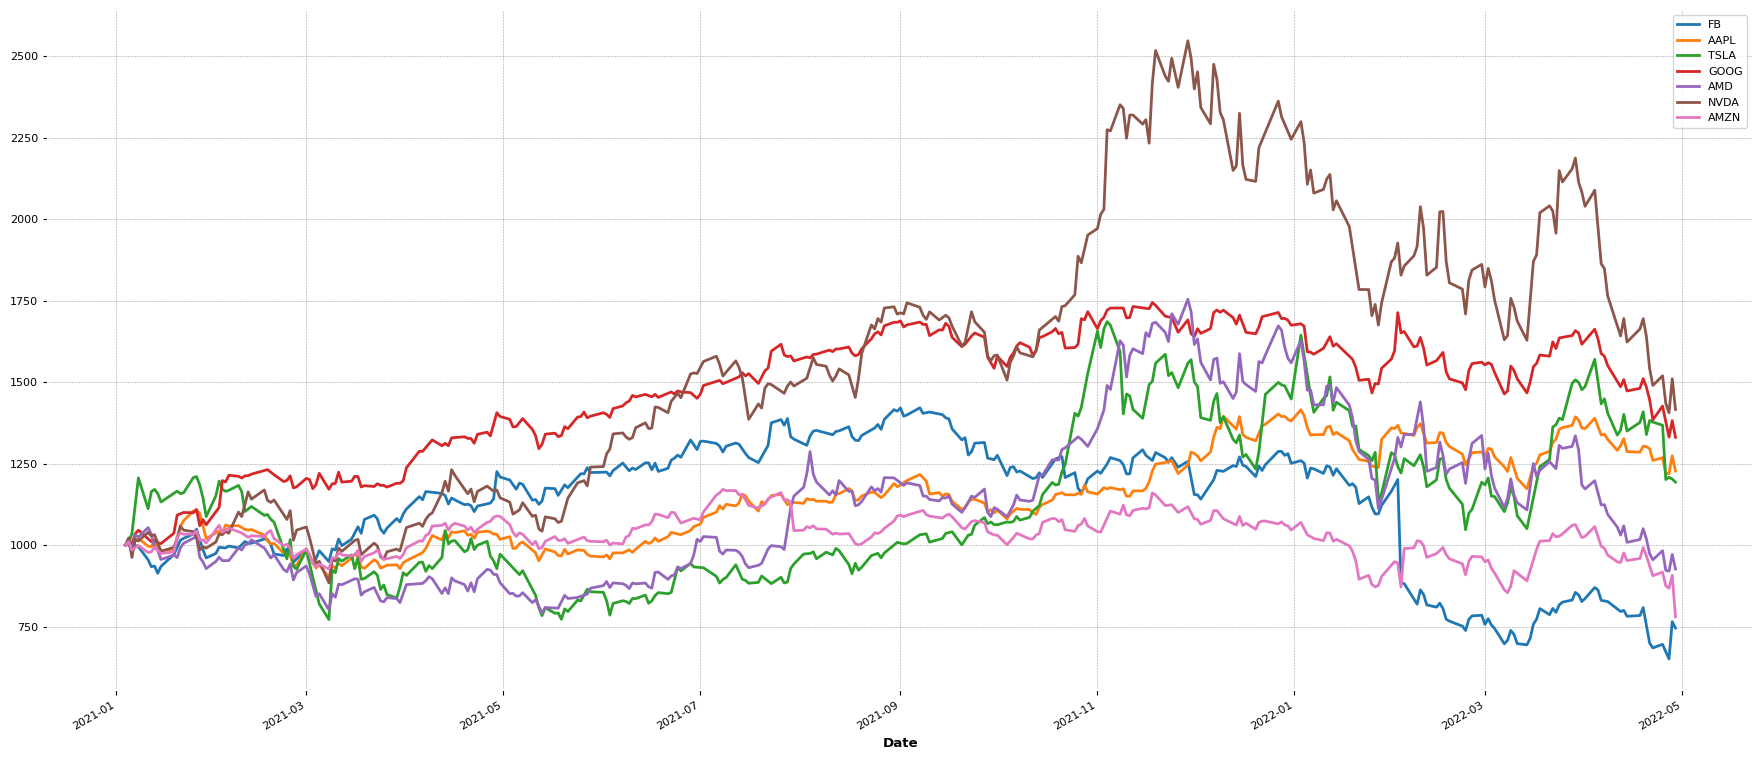

In [35]:
tickers = ["FB", "AAPL", "TSLA", "GOOG", "AMD", "NVDA", "AMZN"]
mult_df = merge_df_by_column_name('Adj Close', 2021, 1, 1, 2022, 5, 1, *tickers)
plot_return_mult_stocks(1000, mult_df)

### Positive Positions: NVDA, GOOG, TSLA, AAPL
### Negative Positions: AMD, FB, AMZN